In [4]:
#importing libraries#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

In [5]:
#READING THE CSV FILE
df=pd.read_csv('Fish.csv')
print(df)


    Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]


In [13]:
#FOR MATRIX OPERATION, SETTING UP ARRAY IS NECESSARY
X = df[['Length1','Length2','Length3','Height','Width']]
Y = df['Weight']

X=X.to_numpy()
Y=Y.to_numpy()

In [14]:
sz=X.shape

nic=sz[1]
n = float(len(df['Species']))

In [15]:
#calculation of mean and standard deviation 
X_mn=np.mean(X,axis=0)
X_sd=np.std(X,axis=0)
X=(X-X_mn)/X_sd
#normalization of data in X to get a better fitting plot
Y_mn=np.mean(Y)
Y_sd=np.std(Y)
Y=(Y-Y_mn)/Y_sd
#normalisation of data in Y to get a better fitting plot



In [16]:
#MAKING 2-D ARRAY OF PATICULAR SHAPE
m=np.zeros([nic, 1],dtype=float)
D_m=np.zeros([nic, 1],dtype=float)
c = 0
D_c=0


In [17]:
L = 0.001
iterations = 100000
n = float(len(df['Weight']))
for i in range(iterations):

    Yf=sum(numpy.transpose(X)*m)+c 
    kp=0
    for j in range(nic):
        D_m[kp,0]=(-2/n)*sum(X[:,kp]*(Y-Yf))
        #first differenciation of the cost function with respect to slope of each independent variable
        m[kp,0]=m[kp,0]-L*D_m[kp,0]
        #updating the values after each iteration
        kp=kp+1
    D_c=(-2/n)*sum(Y-Yf)
    #differenciation of cost function with respect to c
    c=c-L*D_c
    #updating value of c

print(m)
print(c)

[[ 0.46162125]
 [ 0.30466567]
 [-0.13619588]
 [ 0.17922574]
 [ 0.19783195]]
1.664943514992089e-16


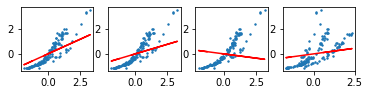

In [18]:

kp=0
for i in range(nic-1):
    plt.subplot(3,4,kp+1)
    plt.scatter(X[:,kp],Y, s=2)
    plt.plot(X[:,kp],X[:,kp]*m[kp]+c,color='red')
    kp=kp+1
plt.show()